In [1]:
import numpy as np
from astropy import units as u
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
from scipy.stats import uniform

# Units

In [2]:
#G_phy = 6.8e-8*u.cm*u.cm*u.cm/u.s/u.s/u.g
#G_iu = 1

#r_iu = 1 * u.au
#r_phy = r_iu.to(u.cm)

#M_iu = 1 * u.M_sun
#M_phy = M_iu.to(u.g)

#v_phy = np.sqrt(G_phy * M_phy / r_phy).to(u.km/u.s)
#t_phy = (r_phy / v_phy).to(u.yr)
#density_phy = (M_phy / (4/3 * np.pi * r_phy**3)).to(u.g/u.cm**3)
#a_phy = (G_phy * M_phy / r_phy**2).to(u.cm/u.s**2)

#E_phy = G_phy*(M_phy**2)/r_phy #cm^2 g s^-2 = erg

Values

In [3]:
# ---- 100 body with R = 1.5e15 cm , m = 2e33 g ----

#R_halo = 1e20
#m_points = 2e33
N_dim = 3

In [4]:
N = 10000
G_p = 6.67*10**(-8)*u.cm**3/(u.g*u.s**2)
G_iu = 1

# radius:
r_iu = 1*u.pc
r_p = r_iu.to(u.cm)

# mass:
M_iu = 1*u.M_sun
M_p = M_iu.to(u.g)

# my values:
m_points = 3*M_iu
R_halo = 90*r_iu

# scale factor :
b = 45


# the density of the cluster is given by:
rho_iu = N*(m_points/M_iu)/((4*np.pi*(R_halo/r_iu)**3)/3)
rho_p = N*M_p/((4*np.pi*(R_halo.to(u.cm))**3)/3)

# compute the collapse time:
cost = np.sqrt(3*np.pi/32)
tc_iu = cost/np.sqrt(G_iu*rho_iu)
tc_p = cost/np.sqrt(G_p*rho_p)

print("The mass of the stars - so my test particles - (in internal units) is: ", m_points/M_iu)
print("The radius of the cluster (in internal units) is: ", R_halo/r_iu)
print("The density of the cluster (in internal units) is: ", rho_iu)
print("The density of the cluster (in physical units) is: ", rho_p)
print("The collapse time (in internal units) is: ", tc_iu)
print("The collapse time (in physical units) is: ", tc_p)

The mass of the stars - so my test particles - (in internal units) is:  3.0
The radius of the cluster (in internal units) is:  90.0
The density of the cluster (in internal units) is:  0.009824379203203415
The density of the cluster (in physical units) is:  2.216348943565359e-25 g / cm3
The collapse time (in internal units) is:  5.475301212564376
The collapse time (in physical units) is:  4463531346157704.5 s


# Random generation through spherical symmetry

In [5]:
def random_points(b):
    
    #theta = np.arccos(np.random.uniform(-1, 1))  
    #phi = np.random.uniform(0, 2*np.pi)     
    
    p =  np.random.uniform(0, 1, N)
    r = b * p**(1/3) * (1-p**(2/3))**(-1/2)
    phi = np.random.uniform(0, 1, N) * (2*np.pi)
    theta = np.arccos(1 - 2*np.random.uniform(0, 1, N))
    
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)

    return r, x, y, z

# output: coordinates as tuple
n_points = [random_points(b) for _ in range(N)]
print(len(n_points[0]))

# output: coordinates as single vectors
#x_p = []
#y_p = []
#z_p = []

for _ in range(N):
    r, x, y, z = random_points(b)
    #x_p.append(x)
    #y_p.append(y)
    #z_p.append(z)


4


Plots

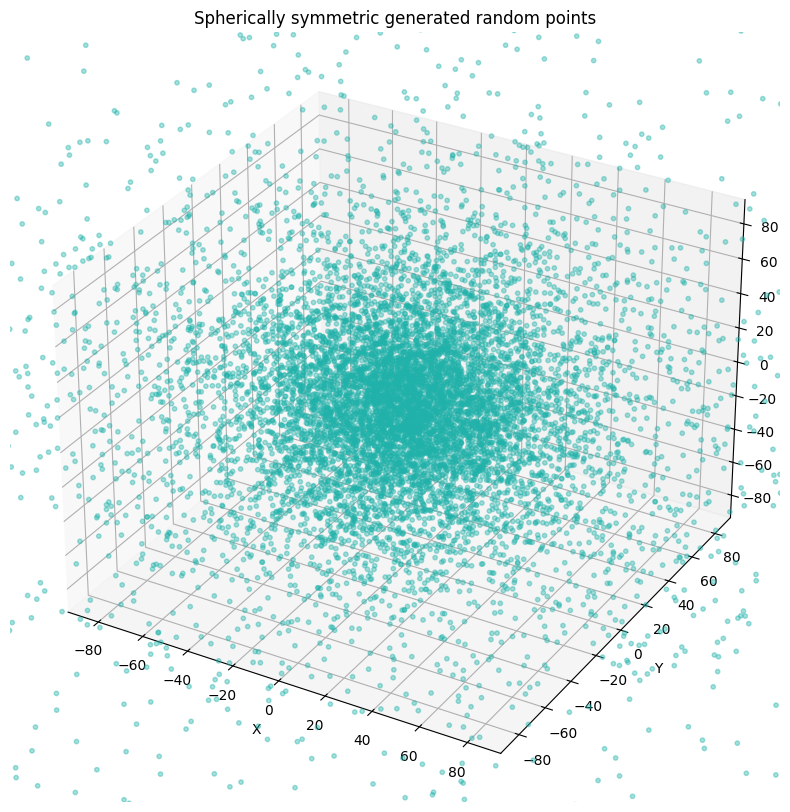

In [6]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")
#ax.scatter(x_p, y_p, z_p, color='black', s=10)
ax.scatter(x, y, z, color='lightseagreen', alpha = 0.4, s=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-90,90)
ax.set_ylim(-90,90)
ax.set_zlim(-90,90)


ax.set_title('Spherically symmetric generated random points')
plt.show()

# Sampling the velocities: Monte Carlo rejection method

q = v / (2 * phi)**(1/2) 

q va da 0 a 1 !!
 

## I need to get the potential

It is of the form
$$\Phi = -\frac{M}{(b^2+r^2)^{1/2}}$$
where we set $G = 1$ in our internal units.where we set $G = 1$ in our internal units.

In [7]:
pot =  -1 * N*m_points / (b**2 + r**2)**(1/2)

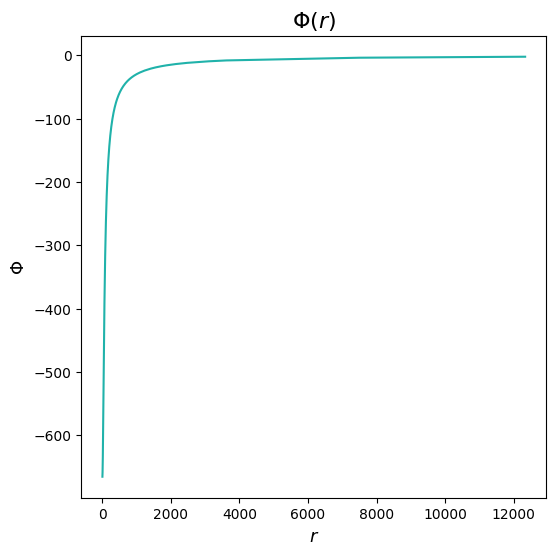

In [8]:
# plot:
plt.figure(figsize = (6,6))
plt.plot(r[np.argsort(r)], pot[np.argsort(r)], c='lightseagreen')
plt.title(r"$\Phi(r)$", fontsize=16)
plt.xlabel(r"$r$", fontsize=13)
plt.ylabel("$\Phi$", fontsize=13)
plt.margins(0.05, 0.05)
plt.show()

## escape velocity

[27.65767507 32.42532215 33.58811625 ... 31.41721147 25.13602355
 19.34484346]


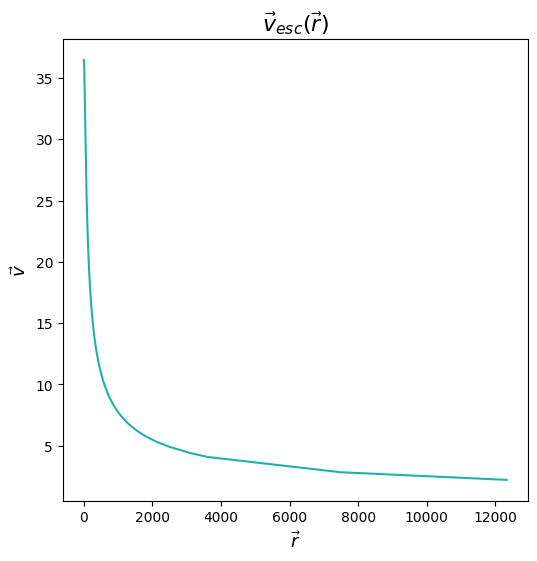

In [9]:
v_esc = (2 * (-1 * pot))**(1/2) * u.solMass**(-1/2)
print(v_esc)
#plot: 
plt.figure(figsize = (6,6))
plt.plot(r[np.argsort(r)], v_esc[np.argsort(r)], c='lightseagreen')
plt.title(r"$\vec{v}_{esc} (\vec{r})$", fontsize=16)
plt.xlabel(r"$\vec{r}$", fontsize=13)
plt.ylabel(r"$\vec{v}$", fontsize=13)
plt.margins(0.05, 0.05)
plt.show()



## rejection sampling

In [10]:
def f_x (q):
    return (1 - q**2)**(7/2) * q**2 
def g_x(f_max):
    return f_max

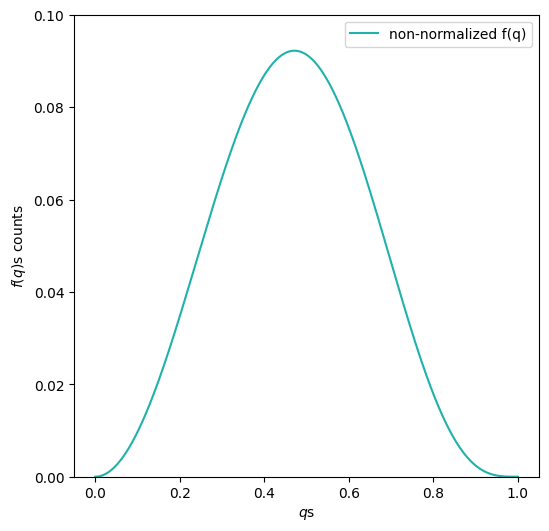

In [11]:
# I take N q between 0 and 1
number_of_qs = 3*N

q_grid = np.linspace (0, 1, number_of_qs)

plt.figure(figsize = (6,6))

plt.plot(q_grid, f_x(q_grid), label="non-normalized f(q)", color='lightseagreen')
plt.xlabel("$q$s")
plt.ylabel("$f(q)$s counts")
plt.ylim(0, 0.1)
plt.legend(loc='upper right', fontsize='medium')
plt.show()

(0.04295146206444051, 7.0437228207492196e-09)


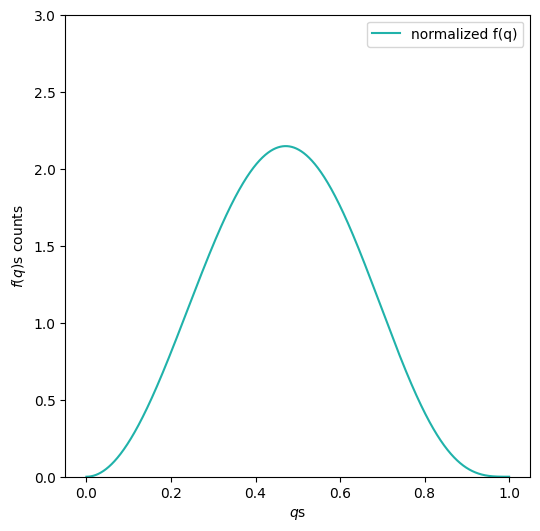

In [12]:
import scipy.integrate as integrate

import scipy.special as special

result = integrate.quad(lambda q_grid: f_x(q_grid), 0, 1)
print(result)
fq_normalized = f_x(q_grid) * 1/result[0]

plt.figure(figsize = (6,6))

plt.plot(q_grid, fq_normalized, label="normalized f(q)", color='lightseagreen')
plt.xlabel("$q$s")
plt.ylabel("$f(q)$s counts")
plt.ylim(0, 3)
plt.legend(loc='upper right', fontsize='medium')
plt.show()



In [13]:
#f_max = np.max(f_x(q_grid))

f_max = np.max(fq_normalized)

#let's generate y in [0, g(x)] 
y = np.random.uniform(0, g_x(f_max),number_of_qs)
y_accepted = []
for i in range(number_of_qs):
    #if y[i] <= f_x(q_grid[i]):
    if y[i] <= fq_normalized[i]:

        y_accepted.append(q_grid[i])

print(len(r), len(y), len(y_accepted))

10000 30000 13900


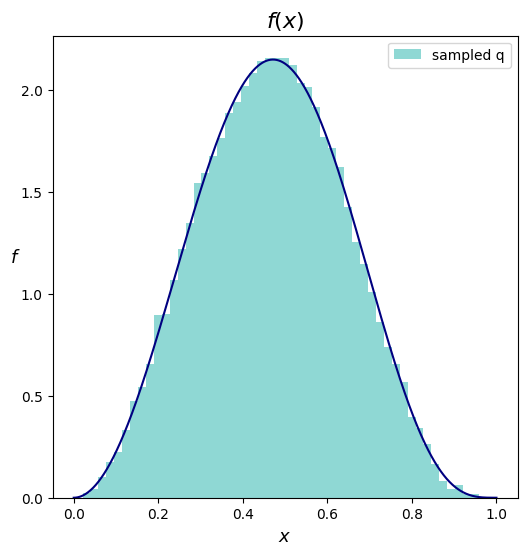

In [14]:
plt.figure(figsize = (6,6))
plt.plot(q_grid, fq_normalized, c='navy')
plt.hist(y_accepted, 50, density=True, color='lightseagreen', alpha=0.5, label='sampled q')

plt.title("$f(x)$", fontsize=16)
plt.xlabel("$x$", fontsize=13)
plt.ylabel("$f$", fontsize=13, rotation=0)
#plt.margins(0.05, 0.05)
plt.legend();

### qui ho un problema: come associo ad un potenziale ( e quindi un raggio) la velocità? a caso? taglio il vettore v_esc casualmente??

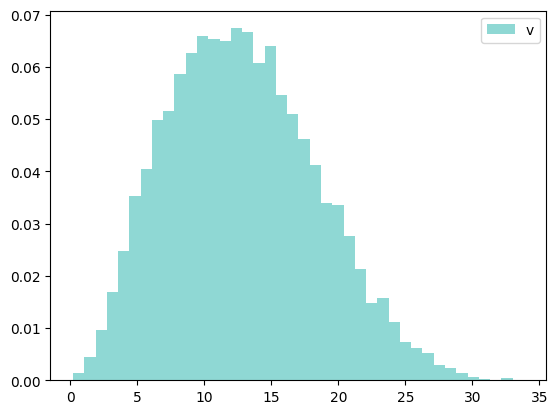

In [15]:
from sklearn.utils import shuffle

y_accepted = np.array(y_accepted)
q_sample = shuffle(y_accepted)

q_ok = q_sample[:N]

v = q_ok * v_esc

plt.hist(v, 40, density=True, color='lightseagreen', alpha=0.5, label='v')
plt.legend()


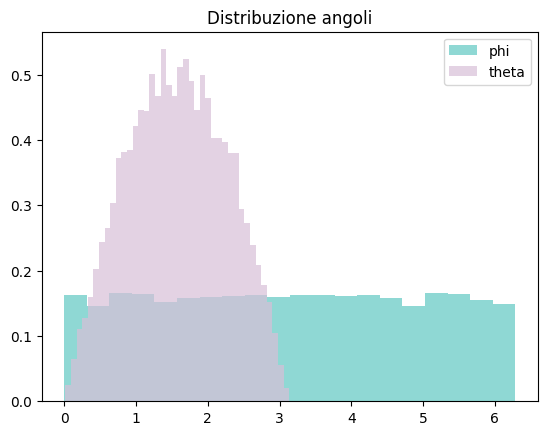

In [16]:
#defining thetha and phi:
phi = np.random.uniform(0, 1, N) * (2*np.pi)
theta = np.arccos(1 - 2*np.random.uniform(0, 1, N))
plt.hist(phi, 20, density=True, color='lightseagreen', alpha=0.5, label='phi')
plt.hist(theta, 40, density=True, color='thistle', alpha=0.7, label='theta')
plt.legend()
plt.title("Distribuzione angoli")


v_x = v * np.sin(theta) * np.cos(phi)
v_y = v * np.sin(theta) * np.sin(phi)
v_z = v * np.cos(theta)

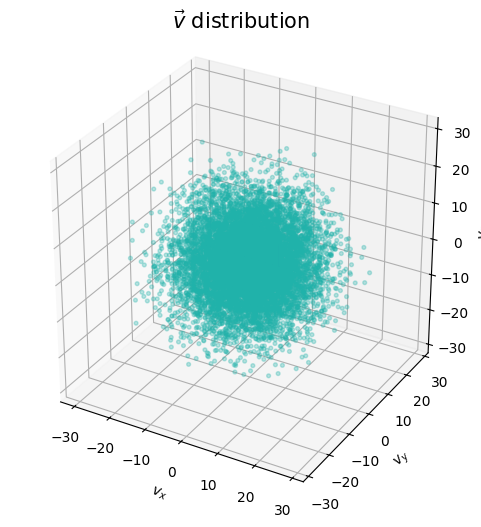

"\nplt.figure(figsize = (6,6))\na = v_esc * np.cos( phi ) *np.sin(theta)  # 1 is v = v_esc\nc = v_esc * np.sin(theta) * np.sin(phi)\nplt.scatter(v_x,v_y, c='lightseagreen', s=5, alpha=0.5)\nplt.scatter(a, c, c='red', label='$v$ = $v_{esc}$')\nplt.axis('equal')\n#plt.xlim(-1.5,1.5)\n#plt.ylim(-1.5,1.5)\nplt.xlabel('x')\nplt.xlabel('y')\nplt.title('2D projection')\nplt.legend();\n"

In [17]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(v_x, v_y, v_z, c = 'lightseagreen', s=7.5, alpha=0.3)
ax.set_aspect('equal')
ax.set_xlabel('$v_x$')
ax.set_ylabel('$v_y$')
ax.set_zlabel('$v_z$')
ax.set_title(r'$\vec{v}$ distribution', fontsize=15)
#ax.set_xlim(-13, 13)
#ax.set_ylim(-13, 13)
#ax.set_zlim(-13, 13)
plt.show();

'''
plt.figure(figsize = (6,6))
a = v_esc * np.cos( phi ) *np.sin(theta)  # 1 is v = v_esc
c = v_esc * np.sin(theta) * np.sin(phi)
plt.scatter(v_x,v_y, c='lightseagreen', s=5, alpha=0.5)
plt.scatter(a, c, c='red', label='$v$ = $v_{esc}$')
plt.axis('equal')
#plt.xlim(-1.5,1.5)
#plt.ylim(-1.5,1.5)
plt.xlabel('x')
plt.xlabel('y')
plt.title('2D projection')
plt.legend();
'''

# Writing on file

In [19]:
#def w_onfile(filename, num_points, radius, masses, dimension, x, y, z):
 #   with open(filename, 'w') as file:
  #      file.write(f'  {num_points} \n  {dimension} \n  {0}  \n')
   #     for i in range(num_points):
    #        file.write(f'  {(masses/M_iu).value}  \n')
     #   for i in range(num_points):
      #      file.write(f'  {(x[i]/r_iu).value}  {(y[i]/r_iu).value}  {(z[i]/r_iu).value}  \n')
       # for i in range(num_points):
            #file.write(f'  {(vx[i]/v_iu).value}  {(vy[i]/v_iu).value}  {(vz[i]/v_iu).value}  \n')
        #    file.write(f'  {0}  {0}  {0}  \n')
            
#filename = 'treecode_in.txt'

#w_onfile(filename, N, R_halo, m_points, N_dim, x, y, z)

In [18]:
def w_onfile(filename, num_points, masses, dimension, x, y, z):
    with open(filename, 'w') as file:
        file.write(f'  {num_points} \n  {dimension} \n  {0}  \n')
        for _ in range(num_points):
            file.write(f'  {(masses/M_iu).value}  \n')
        for i in range(num_points):
            file.write(f'  {x[i]}  {y[i]}  {z[i]}  \n')
        for i in range(num_points):
            #file.write(f'  {(vx[i]/v_iu).value}  {(vy[i]/v_iu).value}  {(vz[i]/v_iu).value}  \n')
            file.write(f'  {v_x[i]}  {v_y[i]}  {v_z[i]} \n')
            
filename = 'treecode_in_4_10000bodies.txt'

w_onfile(filename, N, m_points, N_dim, x, y, z)

# let's calculate the timestep

In [19]:
#x at which we want to arrive, it has to be greter than softening
softening = 0.5
x_min = softening * 10

r_fortime = np.linspace(0, r_p/r_iu, 1000)
#acceleration in function of r:
a = G_iu * rho_iu *r_fortime * 4/3 * np.pi 
#print(a)

In [20]:
timestep = 0.001 * np.sqrt(x_min/max(a))
print(timestep, "internal units")

0.011022703842524302 internal units


In [100]:
print("run: ./treecode in=treecode_in_4.txt out=treecode_out_4.txt dtime=0.001 eps=%f theta=0.1 tstop=10 dtout=0.1
 ", %softening, )

SyntaxError: unterminated string literal (detected at line 1) (2794711524.py, line 1)